<a href="https://colab.research.google.com/github/JaimieOnigkeit/DS-Unit-4-Sprint-1-NLP/blob/main/module1-text-data/Copy_of_LS_DS_421_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

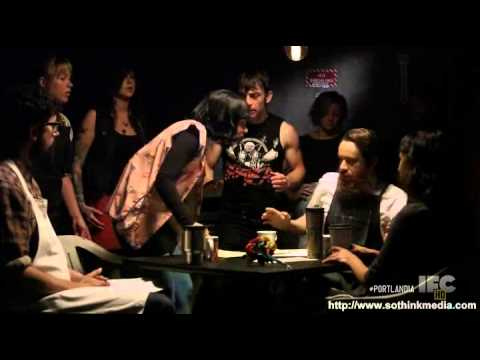

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/content'

In [4]:
!pip install squarify

In [6]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.1MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=58a94c700870dd52b528f0b50015dc4d03560158e25b1609eeacf540405565f6
  Stored in directory: /tmp/pip-ephem-wheel-cache-197xkrrk/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
import pandas as pd
from collections import Counter
import re
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

url = "https://raw.githubusercontent.com/JaimieOnigkeit/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

nlp = spacy.load("en_core_web_lg")

STOP_WORDS = nlp.Defaults.stop_words.union(['come', 'go', 'get', 'time', 'drink', 'place', 'good', 'great', 'like', 'order','check-in', '1', '-', ' ', 'coffee', 'Austin', 'austin', 'check', 'list', 'try',])

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [3]:
#Clean star rating
shops["star_int"] = shops["star_rating"].str[1]
shops["star_int"] = shops["star_int"].astype(str).astype(int)
shops = shops.drop(columns = ["star_rating"])
shops.head()


,coffee_shop_name,full_review_text,star_int
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4


In [4]:
#Seperate date into it's own column
shops["date"] = shops["full_review_text"].str[1:11]
shops["full_review_text"] = shops["full_review_text"].str[11:]
shops.head()

,coffee_shop_name,full_review_text,star_int,date
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5,11/25/2016
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2,11/25/2016
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016


In [5]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [6]:
shops["tokens"] = shops["full_review_text"].apply(tokenize)
shops.head()

,coffee_shop_name,full_review_text,star_int,date,tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5,11/25/2016,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4,11/30/2016,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,"[1, checkin, they, are, located, within, the, ..."


In [7]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [8]:
tokenizer = Tokenizer(nlp.vocab)
tokens = []

for doc in tokenizer.pipe(shops["full_review_text"], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [9]:
shops.head()

,coffee_shop_name,full_review_text,star_int,date,tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5,11/25/2016,"[love, love, loved, atmosphere!, corner, shop,..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,"[listed, date, night:, austin,, ambiance, beau..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4,11/30/2016,"[listed, brunch, spots, loved, eclectic, homey..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2,11/25/2016,"[cool, decor!, drinks, nice, seating, however...."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,"[located, northcross, mall, shopping, center, ..."


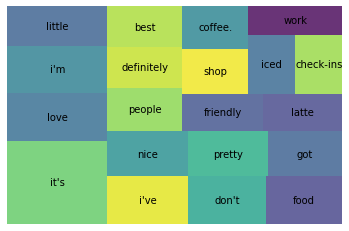

In [10]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [11]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if (((token.pos_ != 'PRON') and (token.is_punct == False)) and (token.text.lower() not in STOP_WORDS)):
            lemmas.append(token.lemma_)
    
    return lemmas

In [12]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)
shops.head()

,coffee_shop_name,full_review_text,star_int,date,tokens,lemmas
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Ev...,5,11/25/2016,"[love, love, loved, atmosphere!, corner, shop,...","[Love, love, love, atmosphere, corner, shop, s..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,"[listed, date, night:, austin,, ambiance, beau...","[list, Date, Night, Ambiance, beautiful, love,..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the...,4,11/30/2016,"[listed, brunch, spots, loved, eclectic, homey...","[list, Brunch, Spots, love, eclectic, homey, p..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Ho...,2,11/25/2016,"[cool, decor!, drinks, nice, seating, however....","[cool, decor, drink, nice, seating, overpriced..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,"[located, northcross, mall, shopping, center, ...","[locate, Northcross, mall, shopping, center, f..."


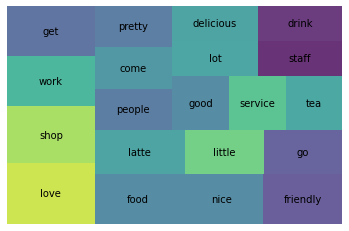

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
29,love,1770,2300,1.0,0.007161,0.007161,0.232405
26,shop,1629,2183,2.0,0.006796,0.013957,0.213892
621,work,1486,1904,3.0,0.005928,0.019885,0.195116
8,get,1467,1903,4.0,0.005925,0.025809,0.192621
371,food,1395,1880,5.0,0.005853,0.031662,0.183167
42,nice,1500,1795,6.0,0.005588,0.037250,0.196954
179,friendly,1624,1720,7.0,0.005355,0.042605,0.213235
10,latte,1176,1711,8.0,0.005327,0.047932,0.154412
598,little,1235,1496,9.0,0.004657,0.052590,0.162159
37,go,1201,1484,10.0,0.004620,0.057210,0.157694


In [13]:
wc = count(shops['lemmas'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

wc_top20

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [14]:
good_shops = shops[shops["star_int"]>=4]
bad_shops = shops[shops["star_int"]<4]

In [15]:
wc_good_lemmas = count(good_shops['lemmas'])
wc_good_lemmas_top5 = wc_good_lemmas[wc_good_lemmas['rank'] <= 6]

print(wc_good_lemmas_top5)

         word  appears_in  count  ...  pct_total  cul_pct_total  appears_in_pct
29       love        1568   2057  ...   0.008221       0.008221        0.255375
26       shop        1317   1758  ...   0.007026       0.015248        0.214495
152  friendly        1436   1511  ...   0.006039       0.021287        0.233876
494      work        1182   1497  ...   0.005983       0.027270        0.192508
8         get        1133   1456  ...   0.005819       0.033089        0.184528
42       nice        1210   1434  ...   0.005731       0.038821        0.197068

[6 rows x 7 columns]


In [16]:
wc_bad_lemmas = count(bad_shops['lemmas'])
wc_bad_lemmas_top5 = wc_bad_lemmas[wc_bad_lemmas['rank'] <= 6]

print(wc_bad_lemmas_top5)

        word  appears_in  count  rank  pct_total  cul_pct_total  appears_in_pct
153     food         319    497   1.0   0.007000       0.007000        0.216125
138       go         338    450   2.0   0.006338       0.013338        0.228997
12       get         334    447   3.0   0.006296       0.019633        0.226287
19   service         336    436   4.0   0.006141       0.025774        0.227642
187     shop         312    425   5.0   0.005986       0.031760        0.211382
51     order         303    420   6.0   0.005915       0.037675        0.205285


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [17]:
#A union between the lists of the top five words in both the positive reviews and negative reviews
word_list = ['love', 'shop', 'work', 'friendly', 'food', 'nice', 'go', 'service','order']

In [18]:
good = wc_good_lemmas[wc_good_lemmas['word'].isin(word_list)]
good = good.sort_values(by=['word'])
bad = wc_bad_lemmas[wc_bad_lemmas['word'].isin(word_list)]
bad = bad.sort_values(by=['word'])

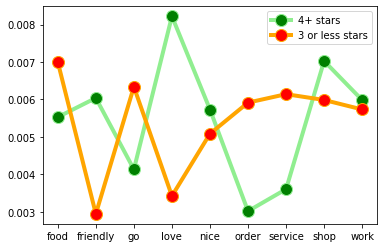

In [19]:
#TODO: Double line graph comparing top 5 words (from each table) w/ same word from other table

plt.plot( 'word', 'pct_total', data=good, marker='o', markerfacecolor='green', markersize=12, color='lightgreen', linewidth=4, label="4+ stars")
plt.plot( 'word', 'pct_total', data=bad, marker='o', markerfacecolor='red', markersize=12, color='orange', linewidth=4, label="3 or less stars")
plt.legend()
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

